In [1]:
import sys
sys.path.append('../')
from numpy import *
from PyGMO import *
import matplotlib.pyplot as plt
from Optimisation import HSS
from Trajectory import Point_Lander_Drag

In [2]:
model = Point_Lander_Drag()
prob  = HSS(model, nsegs=10)

In [3]:
zguess = prob.Guess.Ballistic(tf=20)
pop = population(prob)
pop.push_back(zguess)

In [4]:
algo1 = algorithm.scipy_slsqp(max_iter=5000, screen_output=True)
algo2 = algorithm.mbh(algo1, stop=1)

In [5]:
pop = algo2.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   150    -8.482912E+03     1.000000E+00
    2   300    -8.482993E+03     1.000000E+00
    3   450    -8.483052E+03     1.000000E+00
    4   600    -8.483089E+03     1.000000E+00
    5   750    -8.482861E+03     1.000000E+00
    6   900    -8.482986E+03     1.000000E+00
    7  1050    -8.482991E+03     1.000000E+00
    8  1200    -8.482915E+03     1.000000E+00
    9  1350    -8.482824E+03     1.000000E+00
   10  1500    -8.482830E+03     1.000000E+00
   11  1650    -8.482828E+03     1.000000E+00
   12  1800    -8.482772E+03     1.000000E+00
   13  1950    -8.482608E+03     1.000000E+00
   14  2100    -8.482396E+03     1.000000E+00
   15  2250    -8.481533E+03     1.000000E+00
   16  2400    -8.480103E+03     1.000000E+00
   17  2550    -8.477296E+03     1.000000E+00
   18  2700    -8.467672E+03     1.000000E+00
   19  2850    -8.464246E+03     1.000000E+00
   20  3000    -8.461687E+03     1.000000E+00
   21  3150    -8.455930E+03     1

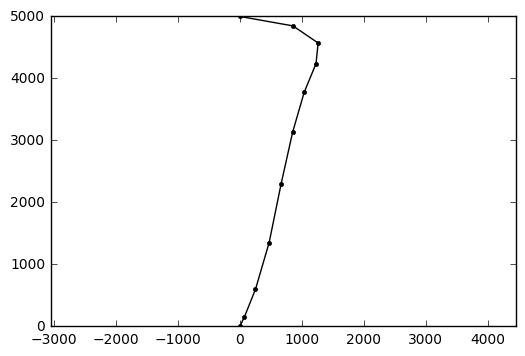

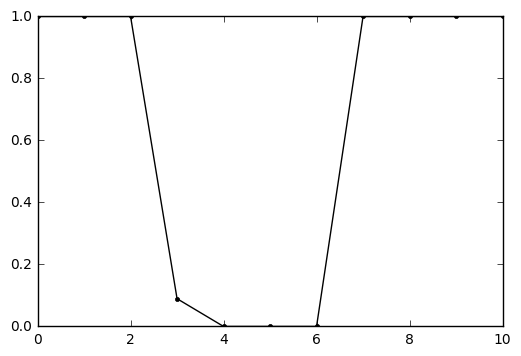

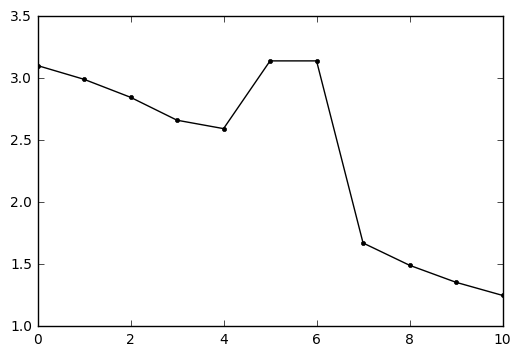

In [6]:
tf, sb, cb, s, c = prob.Decode(pop.champion.x)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.show()
plt.plot(c[:,0], 'k.-')
plt.show()
plt.plot(c[:,1], 'k.-')
plt.show()

In [7]:
# AWESOME! Save it before its lost!
z = pop.champion.x
save("../Data/HSS_10_Mars_Base", z)

In [ ]:
print load("../Data/HSS_20_Mars.npy") # Good, it worked!